# Diagnosis Lung Cancer Using Deep Learning

This notebook will introduce some foundation machine learning and deep learning concepts by exploring the problem of diagnosis lung cancer.

## 1. Problem Definition

In our case, the problem we will be exploring is **Multi-Class Classification** 

This is because we're going to be using a **Histopathological Images** about a person to predict whether they have :

* **Lung benign tissue**  
* **Lung adenocarcinoma**
* **Lung squamous cell carcinoma** 


In a statement,

> Given histopathological images about a patient, can we diagnosis if he has Lung Cancer or not?

## 2. Data

The original data came from the [Academic Torrents](https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af) from Cornell University

Howevever, we've downloaded it from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

Original Article :

 > Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Relevant Links :

[arxiv](https://arxiv.org/abs/1912.12142v1) ,  [github](https://github.com/tampapath/lung_colon_image_set)

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since deep learning is very experimental, you might say something like, 

> IF we can reach 95% accuracy at predicting whether or not a patient has lung cancer during the proof of concept, we'll pursue this project.

## 4. Features

Lung cancer may not cause any symptoms, especially in the early stages of disease. 

Therefore, it may first be detected on **X-rays , CT scans** or other kinds of tests being done to check on another condition.

We will define every type of lung cancer and Lung benign tissue

Our data set contains 3 types of Lung condition :


1. **Lung benign tissue ==> lung_n :** 
            
     * A benign lung tumor is an abnormal growth of tissue that serves no purpose and is found not to be cancerous.Benign lung          tumors may grow from many different structures in the lung. 
     
     * Determining whether a nodule is a benign tumor or an early stage of cancer is very important.That's because early               detection and treatment of lung cancer can greatly enhance your survival. ([WebMD](https://www.webmd.com/lung/benign-lung-tumors-and-nodules#:~:text=A%20benign%20lung%20tumor%20is,of%20cancer%20is%20very%20important.))


2. **Lung adenocarcinoma ==> lung_aca :**

    * Lung adenocarcinoma is a subtype of non-small cell lung cancer (NSCLC). Lung adenocarcinoma is categorized as such by how       the cancer cells look under a microscope. Lung adenocarcinoma starts in glandular cells, which secrete substances such as       mucus, and tends to develop in smaller airways, such as alveoli. Lung adenocarcinoma is usually located more along the         outer edges of the lungs. Lung adenocarcinoma tends to grow more slowly than other lung cancers.([1,2,3,4](https://www.cancer.org/cancer/non-small-cell-lung-cancer/about/what-is-non-small-cell-lung-cancer.html,http://www.cancer.gov/dictionary,https://www.cancer.gov/types/lung/patient/non-small-cell-lung-treatment-pdq)) 
    
        <img src="images/adeno-histology.png" width=500/> 
        
    * Lung adenocarcinoma accounts for 40% of all lung cancers. It is found more often in women. Younger people (aged 20-46)         who have lung cancer are more likely to have lung adenocarcinoma than other lung cancers. Most lung cancers in people who       have never smoked are adenocarcinomas.([1,5](https://www.cancer.org/cancer/non-small-cell-lung-cancer/about/what-is-non-small-cell-lung-cancer.html.,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6037963/))
    
    * Note that lung adenocarcinoma may not cause any symptoms, especially early on in its development, and that the                 signs and symptoms are not specific to lung adenocarcinoma and may be caused by other conditions.
    
    
3. **Lung squamous cell carcinoma ==> lung_scc :** 

    * Squamous cell lung cancer, or squamous cell carcinoma of the lung, is one type of non-small cell lung cancer (NSCLC).          Squamous cell lung cancer is categorized as such by how the cells look under a microscope. Squamous cell lung cancer            begins in the squamous cells—thin, flat cells that look like fish scales when seen under a microscope. They line the            inside of the airways in the lungs. Squamous cell lung cancer is also called epidermoid carcinoma.([6,2](http://www.cancer.gov/types/lung/patient/non-small-cell-lung-treatment-pdq,http://www.cancer.gov/dictionary))
 
        <img src="images/squamous-histology.png" width=500/> 

    * Squamous cell lung tumors usually occur in the central part of the lung or in one of the main airways (left or right            bronchus). The tumor’s location is responsible for symptoms such as cough, trouble breathing, chest pain, and blood in          the sputum. If the tumor grows to a large size, a chest X-ray or computed tomography (CT or CAT ) scan may detect a            cavity in the lung. A cavity is a gas- or fluid-filled space within a tumor mass or nodule and is a classic sign of            squamous cell lung cancer. Squamous cell lung cancer can spread to multiple sites, including the brain, spine and other        bones, adrenal glands, and liver.([7,8](https://www.health.harvard.edu/a-to-z/squamous-cell-carcinoma-of-the-lung-a-to-z,https://appliedradiology.com/articles/cavities-in-the-lung-in-oncology-patients-imaging-overview-and-differential-diagnoses))

   * About 30% of all lung cancers are classified as squamous cell lung cancer. It is more strongly associated with smoking         than any other type of non-small cell lung cancer. Other risk factors for squamous cell lung cancer include age, family         history, and exposure to secondhand smoke, mineral and metal dust, asbestos, or radon.([7](https://www.health.harvard.edu/a-to-z/squamous-cell-carcinoma-of-the-lung-a-to-z))

   * Note that squamous cell lung cancer may not cause any symptoms, espcially early on its development, and that the signs         and symptoms are not specific to squamous cell lung cancer and may be caused by other conditions.

    
    

 ## 5. Preparing the tools
 
* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.
* [TensorFlow](https://www.tensorflow.org/) for bundles together Machine Learning and Deep Learning models and algorithms./Deep Learning Framework


In [1]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import tensorflow as tf
import os

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from tensorflow.keras.models import Sequential

## Layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout #for Overfiting Problem

## Preprocessing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping #for Overfiting Problem
from tensorflow.keras.utils import plot_model
from matplotlib.image import imread
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image


## Model evaluators
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#Load Model
from tensorflow.keras.models import load_model

## 6. Load Data 

- This dataset contains **15,000 histopathological images** with 3 classes. All images are **768 x 768 pixels** in size and are in **jpeg** file format.
- The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 750 total images of lung tissue (250 benign lung tissue, 250 lung adenocarcinomas, and 250 lung squamous cell carcinomas) and augmented to 15,000 using the Augmentor package.
- There are Three classes in the dataset, each with 5,000 images, being :
    * **Lung benign tissue ==> lung_n**
    * **Lung adenocarcinoma ==> lung_aca**
    * **Lung squamous cell carcinoma ==> lung_scc**


In [2]:
#load data direction
data_dir = 'E:\\Final Project\\lung_data_split'

In [3]:
#what our data include
os.listdir(data_dir)

['test', 'train', 'val']

In [4]:
train_data_dir = data_dir+'\\train\\'
val_data_dir = data_dir+'\\val\\'
test_data_dir = data_dir+'\\test\\'

In [5]:
os.listdir(train_data_dir)

['lung_aca', 'lung_n', 'lung_scc']

In [6]:
os.listdir(test_data_dir)

['lung_aca', 'lung_n', 'lung_scc']

In [7]:
os.listdir(val_data_dir)

['lung_aca', 'lung_n', 'lung_scc']

## 7.Preparing the Data

### 7.1 Data Augmentation

* We will increase the size of the image training dataset artificially by performing some Image Augmentation technique.

In [8]:
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                               rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True
                              )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale=1./255)

### 7.2 Loading the Images

In [9]:
train =image_gen.flow_from_directory(
                                     train_data_dir,
                                     target_size=(150,150),
                                     color_mode='rgb',
                                     class_mode='categorical',
                                     batch_size=32
                                    )

test =test_data_gen.flow_from_directory(
                                         test_data_dir,
                                         target_size=(150,150),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=32,
                                         shuffle=False
                                        )
# setting shuffle as False just so we can later compare it with predicted values without having indexing problem

valid =test_data_gen.flow_from_directory(
                                         val_data_dir,
                                         target_size=(150,150),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=32,
                                        )



Found 10500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [10]:
train.class_indices

{'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}

### Look at some of the train set images

In [11]:
lung_aca_names = os.listdir(train_data_dir+'\\lung_aca\\')
lung_aca_names[:10]
lung_n_names = os.listdir(train_data_dir+'\\lung_n\\')
lung_n_names[:10]
lung_scc_names = os.listdir(train_data_dir+'\\lung_scc\\')
lung_scc_names[:10]


['lungscc100.jpeg',
 'lungscc1000.jpeg',
 'lungscc1001.jpeg',
 'lungscc1002.jpeg',
 'lungscc1003.jpeg',
 'lungscc1004.jpeg',
 'lungscc1005.jpeg',
 'lungscc1006.jpeg',
 'lungscc1007.jpeg',
 'lungscc1008.jpeg']

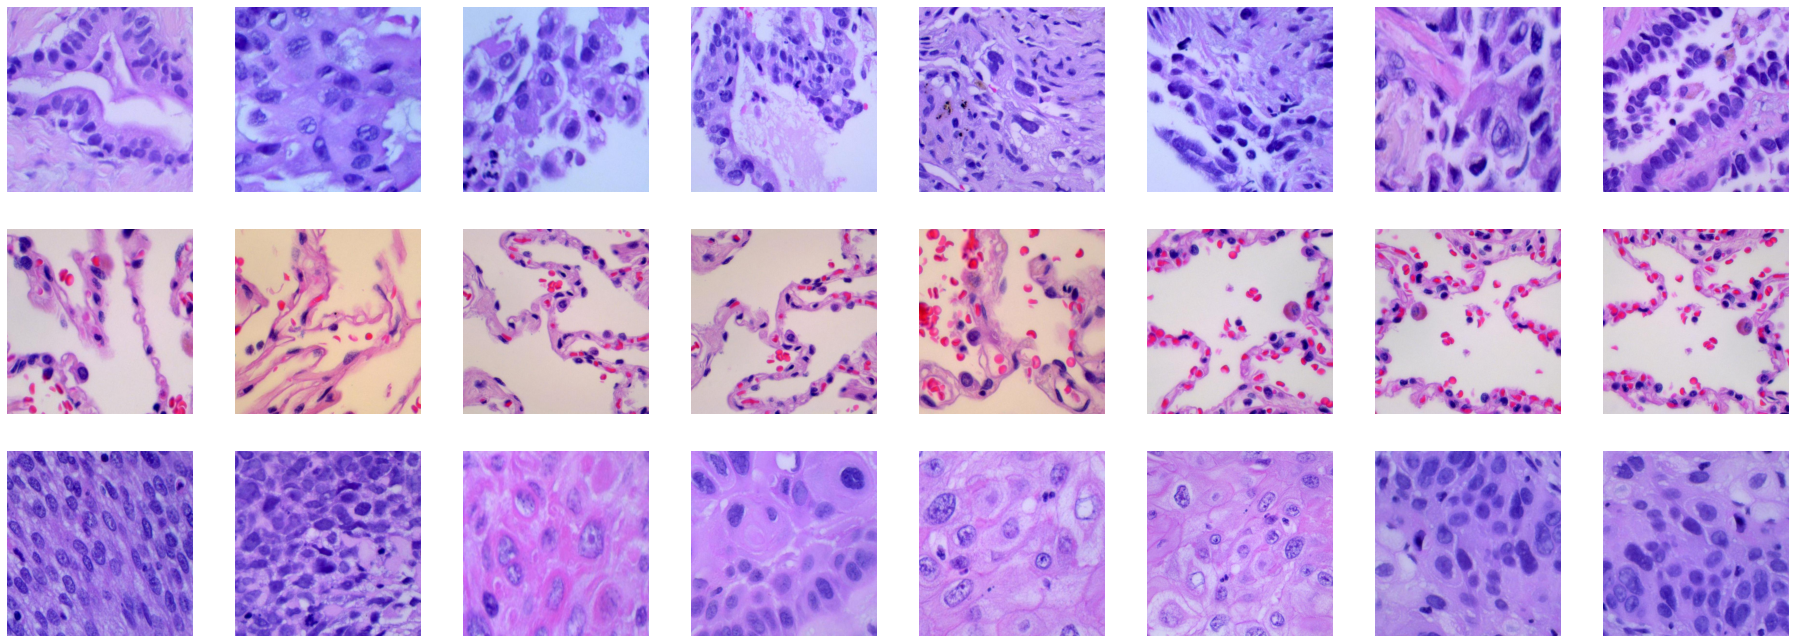

In [12]:
# parameters for the graph. The images will be in a 4x4 configuration
nrows = 8
ncols = 8

pic_index = 0 #index for iterating over images

#set up matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

lung_aca_pic = [os.path.join(train_data_dir+'\\lung_aca\\', fname) for fname in lung_aca_names[pic_index-8:pic_index]]
lung_n_pic = [os.path.join(train_data_dir+'\\lung_n\\', fname) for fname in lung_n_names[pic_index-8:pic_index]]
lung_scc_pic = [os.path.join(train_data_dir+'\\lung_scc\\', fname) for fname in lung_scc_names[pic_index-8:pic_index]]


for i, img_path in enumerate(lung_aca_pic + lung_n_pic +lung_scc_pic):
    # setting up subplot. subplots start at index 1
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("off") #turning off axis. Don't show axis
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

#1-Lung adenocarcinoma 
#2-Lung benign tissue
#3-Lung squamous cell carcinoma 

## 8.Convolutional Neural Network

- IT an Artificial Neural Network that has the ability to pin point or detect patterns in the images.
CNN architecture Example by [Wikimedia](https://commons.wikimedia.org/wiki/File:Typical_cnn.png)

<img src="images/Convolutional-Neural-Network.png" width=700/>



- Image to see how CCN work 

<img src="images/blog-convolutional-neural-network-6.png" width=700/>


In [13]:
#Define the model Layers (Define The model)
model =Sequential() 

# first convolution
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# second convolution
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Third convolution
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten before feeding into Dense neural network. 
model.add(Flatten())
          
# 512 neurons in the hidden layer          
model.add(Dense(512,activation='relu'))
          
model.add(Dropout(rate=0.4))       
 
#3 = 3 different categories
    # softmas takes a set of values and effectively picks the biggest one. for example if the output layer has
    # [0.1,0.1,0.5], it will take it and turn it into [0,0,1]    
model.add(Dense(3,activation='softmax'))          

#Compiling the model

optmz = tf.keras.optimizers.Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')

model.compile(optimizer =optmz,loss="categorical_crossentropy",metrics=['accuracy'])


### Getting a summary of the model built above.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## 8.1 Fit the model


In [15]:
#Defining Callback list
early = EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [16]:
#Fit The model
model.fit_generator(train,epochs=25,validation_data=valid)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
329/329 [==============================] - 393s 1s/step - loss: 0.4066 - accuracy: 0.8188 - val_loss: 0.2828 - val_accuracy: 0.8740
Epoch 2/25
329/329 [==============================] - 289s 878ms/step - loss: 0.2608 - accuracy: 0.8943 - val_loss: 0.2166 - val_accuracy: 0.9113
Epoch 3/25
329/329 [==============================] - 270s 821ms/step - loss: 0.2037 - accuracy: 0.9188 - val_loss: 0.1838 - val_accuracy: 0.9210
Epoch 4/25
329/329 [==============================] - 277s 841ms/step - loss: 0.1859 - accuracy: 0.9284 - val_loss: 0.1579 - val_accuracy: 0.9370
Epoch 5/25
329/329 [==============================] - 284s 863ms/step - loss: 0.1673 - accuracy: 0.9350 - val_loss: 0.1489 - val_accuracy: 0.9413
Epoch 6/25
329/329 [==============================] - 308s 935ms/step - loss: 0.1607 - accuracy: 0.9356 - val_loss: 0.1804 - val_accuracy: 0.9240
Epoch 7/25
329/329 [==============================]

#### After 25th epochs , loss: 3.76% - accuracy: 98.75% - val_loss =2.65% and val_accuracy = 99.1%.

## 9.Evaluate

In [29]:
#Display Data Frame , to show result 
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.406556,0.818762,0.282786,0.874000
1,0.260829,0.894286,0.216612,0.911333
2,0.203748,0.918762,0.183814,0.921000
3,0.185943,0.928381,0.157870,0.937000
4,0.167282,0.934952,0.148858,0.941333
5,0.160665,0.935619,0.180409,0.924000
6,0.131286,0.949143,0.140499,0.937667
7,0.124453,0.952571,0.112573,0.952667
8,0.125083,0.951048,0.143113,0.945000
9,0.106354,0.958667,0.076468,0.971667


#### Display some graphs to see if model work good in training or not

<AxesSubplot:>

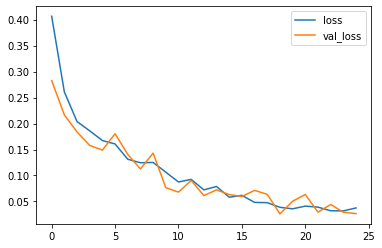

In [30]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

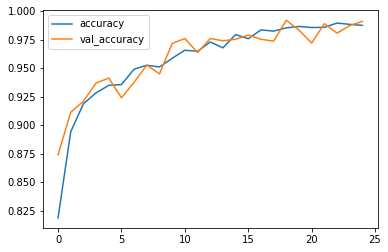

In [31]:
losses[['accuracy','val_accuracy']].plot()

### 9.1 Evaluating our model with Data that he didn't see before

### Classification Report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [73]:
#Print classification Report

test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = model.predict_generator(test, steps=test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test.classes

class_labels = list(test.class_indices.keys())   

report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)  

              precision    recall  f1-score   support

    lung_aca       0.98      0.99      0.99       500
      lung_n       1.00      1.00      1.00       500
    lung_scc       0.99      0.98      0.98       500

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).


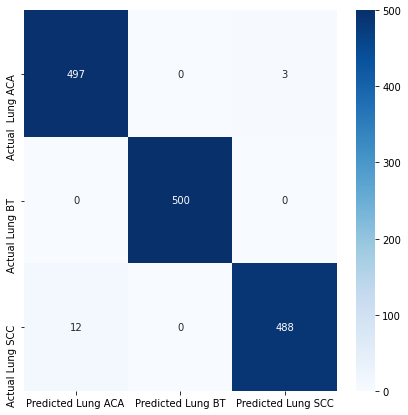

In [114]:
#Print confusion matrix

plt.subplots(figsize=(7,7))

cm = confusion_matrix(true_classes,predicted_classes)

cm_df =pd.DataFrame(cm,
                    columns=['Predicted Lung ACA ','Predicted Lung BT','Predicted Lung SCC'],
                    index=['Actual  Lung ACA ','Actual Lung BT','Actual Lung SCC'])

sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='.0f');

In [115]:
#Save The Model 
model.save("lung_cancer.h5")

### 9.2 Predict Some Images :

 
 * Index 0 =Lung adenocarcinoma ==> lung_aca
 * Index 1 =Lung benign tissue ==> lung_n
 * Index 2 =Lung squamous cell carcinoma ==> lung_scc

In [67]:
# Index 1 = Lung benign tissue ==> lung_n
single_Lung_hist_n = "E:\\Final Project\\lung_data_split\\test\\lung_n\\lungn242.jpeg"

img = image.load_img(single_Lung_hist_n, target_size = (150, 150))
array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)
test_image = model.predict_proba(x)
result = test_image.argmax(axis=-1)

if result ==[2]:
    print('Lung squamous cell carcinoma ')
elif result ==[0]:
    print('Lung Adenocarcinoma')
elif result ==[1]:
    print('Lung benign tissue ') 

Lung benign tissue 


In [68]:
#Index 0 =Lung benign tissue ==> lung_n
single_lung_aca = "E:\\Final Project\\lung_data_split\\test\\lung_aca\\lungaca334.jpeg"

img = image.load_img(single_lung_aca, target_size = (150, 150))
array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)
test_image = model.predict_proba(x)
result = test_image.argmax(axis=-1)

if result ==[2]:
    print('Lung squamous cell carcinoma ')
elif result ==[0]:
    print('Lung Adenocarcinoma')
elif result ==[1]:
    print('Lung benign tissue ') 

Lung Adenocarcinoma


In [64]:
# Index 2 =Lung squamous cell carcinoma ==> lung_scc
single_Lung_hist_scc = "E:\\Final Project\\lung_data_split\\test\\lung_scc\\lungscc244.jpeg"

img = image.load_img(single_Lung_hist_scc,target_size = (150,150))
array = image.img_to_array(img)
x = np.expand_dims(array, axis=0)
test_image = model.predict_proba(x)
result = test_image.argmax(axis=-1)

if result ==[2]:
    print('Lung squamous cell carcinoma ')
elif result ==[0]:
    print('Lung Adenocarcinoma')
elif result ==[1]:
    print('Lung benign tissue ')    

Lung squamous cell carcinoma 


## 10. Load Model 

In [ ]:
#Load Model
model_dir= 'lung_cancer.h5'

# loading using .h5 file
new_lung_model = tf.keras.models.load_model(
    "lung_cancer.h5",
    custom_objects=None,
    compile=True)

In [ ]:
loss,acc = new_lung_model.evaluate(valid, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))